Pre-processing Data

In [151]:
#Importing Libraries for pre processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#for fiqures
fWidth = 5
fHeight = 12

df = pd.read_csv("vgsales.csv")
#shape of the dataset
df.shape
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


About the dataset

In [152]:

#first 5 datas of the dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [153]:
#Info of the dataset
df.info()

# there are some missing values in year section

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [154]:
# full description of the dataset only numerical values
df.describe()



,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [155]:
# removing "Publisher", "Name", "Rank" column
if "Publisher" in df.columns:
    df = df.drop(columns=["Publisher"])
else:
    df = df.copy()

if "Name" in df.columns:
    df = df.drop(columns=["Name"])
else:
    df = df.copy()

if "Rank" in df.columns:
    df = df.drop(columns=["Rank"])
else:
    df = df.copy()

df.head()

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [156]:
#removing duplicates
df_nodup = df.drop_duplicates()
print("After removing Duplicates:")
print("Before: ",df.shape,"| After: ",df_nodup.shape)

After removing Duplicates:
Before:  (16598, 8) | After:  (15020, 8)


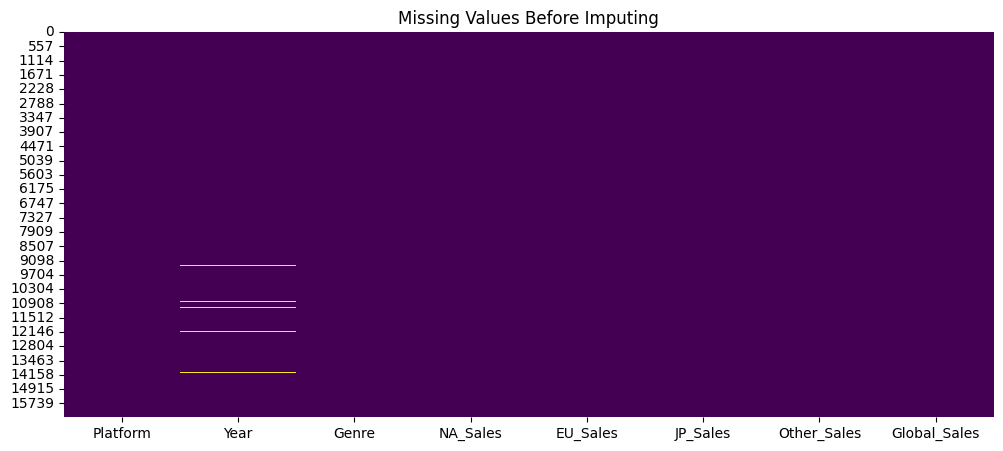

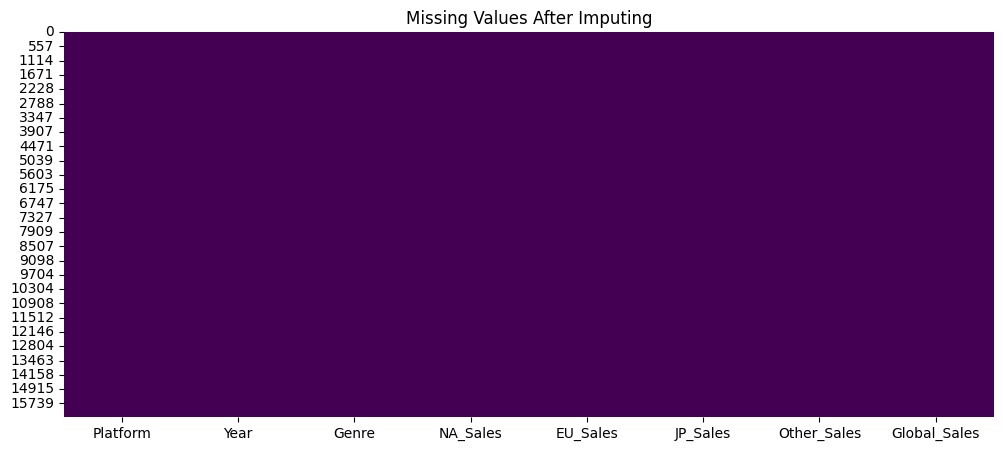

In [157]:
# Handling missing values
numeric_cols = df_nodup.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

#Visualization Before Imputing
plt.figure(figsize=(12,5))
sns.heatmap(df_nodup.isnull(),cbar=False,cmap="viridis")
plt.title("Missing Values Before Imputing")
plt.show()


#Imputation
df_imputed = df_nodup.copy()
for col in numeric_cols:
  df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())
for col in categorical_cols:
  df_imputed[col] =df_imputed[col].fillna(df_imputed[col].mode()[0])


#Visualization After Imputing
plt.figure(figsize=(12,5))
sns.heatmap(df_imputed.isnull(),cbar=False,cmap="viridis")
plt.title("Missing Values After Imputing")
plt.show()

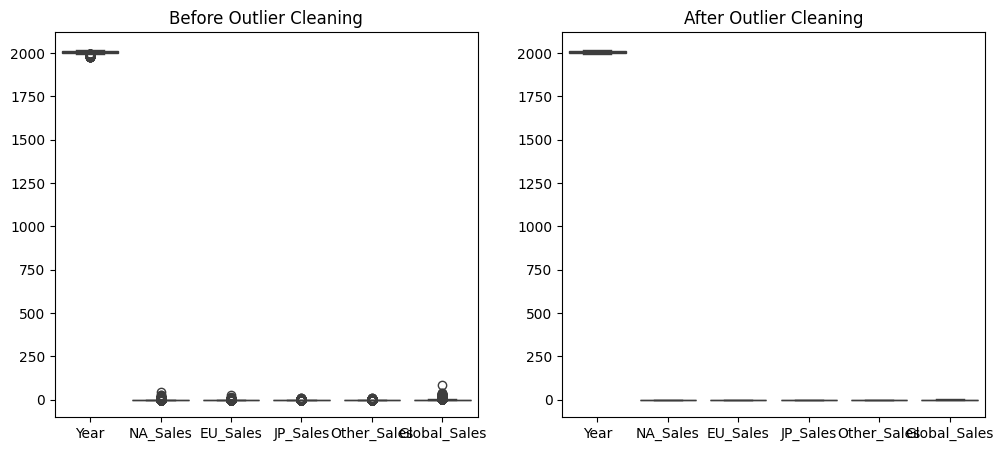

In [158]:
# had some problems with year value, the ai helped to clear
#Handling Outliers
df_outlier_cleaned = df_imputed.copy()

for col in numeric_cols:
  q1 = df_outlier_cleaned[col].quantile(0.25)
  q3 = df_outlier_cleaned[col].quantile(0.75)
  iqr = q3 - q1
  lower=q1 -1.5*iqr
  upper=q3+1.5*iqr
  df_outlier_cleaned[col] = df_outlier_cleaned[col].clip(lower, upper)


# Visualization of before and after outlier cleaned
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df_imputed[numeric_cols])
plt.title("Before Outlier Cleaning")

plt.subplot(1,2,2)
sns.boxplot(data=df_outlier_cleaned[numeric_cols])
plt.title("After Outlier Cleaning")
plt.show()


In [159]:
# Handling catagorical value (Encoding+ visualization)
# for col in categorical_cols:
#   plt.figure(figsize=(5,3))
#   df_outlier_cleaned[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
#   plt.title(f"Catagorical Distribution of {col}")
#   plt.show()

#On-hot Encoding
encoded = pd.get_dummies(df_outlier_cleaned[categorical_cols],drop_first=True)
df_encoded = pd.concat([df_outlier_cleaned.drop(categorical_cols,axis=1),encoded],axis=1)
df_encoded.head(5)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2006.0,0.66,0.325,0.1,0.1,1.205,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1992.5,0.66,0.325,0.1,0.1,1.205,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,2008.0,0.66,0.325,0.1,0.1,1.205,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2009.0,0.66,0.325,0.1,0.1,1.205,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1996.0,0.66,0.325,0.1,0.1,1.205,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


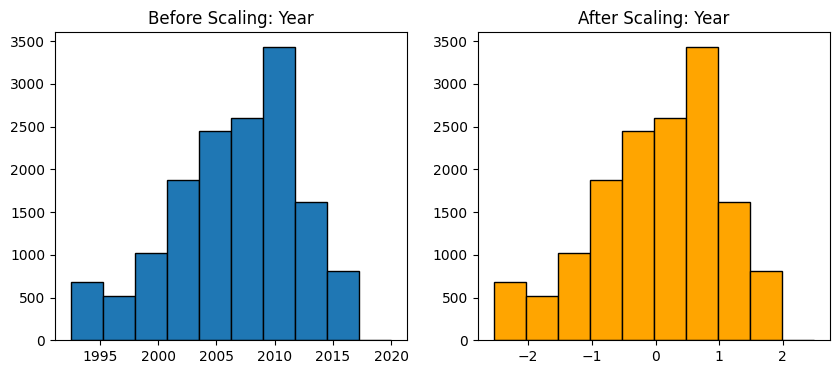

In [160]:
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Visualization: Histogram before vs after scaling (Age example)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df_encoded["Year"], bins=10, edgecolor="black")
plt.title("Before Scaling: Year")

plt.subplot(1,2,2)
plt.hist(df_scaled["Year"], bins=10, edgecolor="black", color="orange")
plt.title("After Scaling: Year")
plt.show()

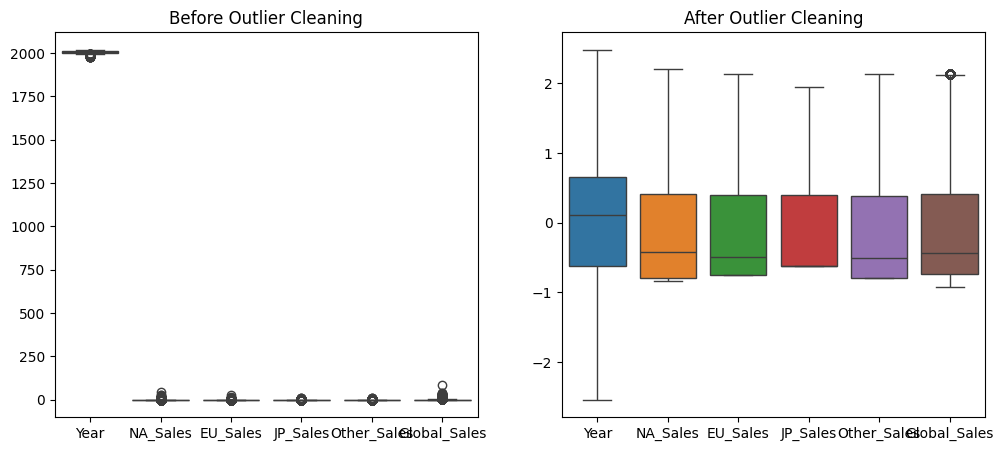

In [165]:
# Visualization of before and after outlier cleaned
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df_imputed[numeric_cols])
plt.title("Before Outlier Cleaning")

plt.subplot(1,2,2)
sns.boxplot(data=df_scaled[numeric_cols])
plt.title("After Outlier Cleaning")
plt.show()

In [161]:
# Example: Suppose "EmployeeID" column is irrelevant
if "Rank" in df_scaled.columns:
    df_final = df_scaled.drop(columns=["Rank"])
else:
    df_final = df_scaled.copy()

print("🔹 After removing irrelevant features")
print(df_final.head())

🔹 After removing irrelevant features
       Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0 -0.074254  2.214921  2.138876    1.9512     2.139563      2.138169   
1 -2.543353  2.214921  2.138876    1.9512     2.139563      2.138169   
2  0.291538  2.214921  2.138876    1.9512     2.139563      2.138169   
3  0.474434  2.214921  2.138876    1.9512     2.139563      2.138169   
4 -1.903216  2.214921  2.138876    1.9512     2.139563      2.138169   

   Platform_3DO  Platform_3DS  Platform_DC  Platform_DS  ...  Genre_Fighting  \
0         False         False        False        False  ...           False   
1         False         False        False        False  ...           False   
2         False         False        False        False  ...           False   
3         False         False        False        False  ...           False   
4         False         False        False        False  ...           False   

   Genre_Misc  Genre_Platform  Genre_Puzzle  Genr

✅ All datasets exported to 'processed_employees.xlsx'


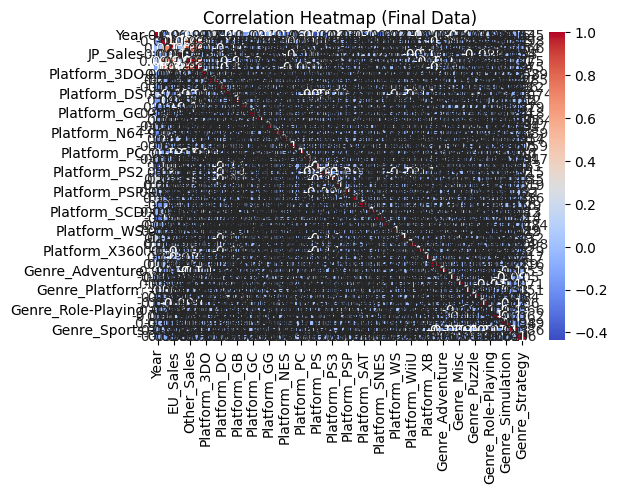

In [168]:
# save and finalize
# with pd.ExcelWriter("processed_employees.xlsx") as writer:
#     df.to_excel(writer, sheet_name="Raw Data", index=False)
#     df_nodup.to_excel(writer, sheet_name="No Duplicates", index=False)
#     df_imputed.to_excel(writer, sheet_name="After Imputation", index=False)
#     df_outlier_cleaned.to_excel(writer, sheet_name="After Outlier Clipping", index=False)
#     df_encoded.to_excel(writer, sheet_name="After Encoding", index=False)
#     df_scaled.to_excel(writer, sheet_name="After Scaling", index=False)
#     df_final.to_excel(writer, sheet_name="Final Processed", index=False)

print("✅ All datasets exported to 'processed_employees.xlsx'")

#Final visualization: Heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(df_final.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Final Data)")
plt.show()

Using ML Algorithms

In [166]:
# Importing libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


df_ml=df_outlier_cleaned.copy()
df_ml

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,0.66,0.325,0.1,0.1,1.205
1,NES,1992.5,Platform,0.66,0.325,0.1,0.1,1.205
2,Wii,2008.0,Racing,0.66,0.325,0.1,0.1,1.205
3,Wii,2009.0,Sports,0.66,0.325,0.1,0.1,1.205
4,GB,1996.0,Role-Playing,0.66,0.325,0.1,0.1,1.205
...,...,...,...,...,...,...,...,...
16592,DS,2008.0,Simulation,0.01,0.000,0.0,0.0,0.010
16593,GBA,2002.0,Platform,0.01,0.000,0.0,0.0,0.010
16595,PS2,2008.0,Racing,0.00,0.000,0.0,0.0,0.010
16596,DS,2010.0,Puzzle,0.00,0.010,0.0,0.0,0.010


In [164]:
# DecisionTreeClassifier
#Spliting data
X = df_ml.drop(columns=["Global_Sales","Platform","Genre"])
Y = df_ml["Global_Sales"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
score = accuracy_score(Y_test, predictions)
print("Accuracy Score: ",score)

# problem: DT can not convert to string to number

KeyError: "['Platform', 'Genre'] not found in axis"

In [ ]:
# KNeighborsClassifier
#Spliting data
X = df_ml.drop(columns=["Global_Sales"])
Y = df_ml["Global_Sales"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
score = accuracy_score(Y_test, predictions)
print("Accuracy Score: ",score)

In [ ]:
# RandomForestClassifier
#Spliting data
X = df_ml.drop(columns=["Global_Sales"])
Y = df_ml["Global_Sales"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
score = accuracy_score(Y_test, predictions)
print("Accuracy Score: ",score)